# Deep Learning NoteBook: Chapter 03

Author: Shahrokh Abbasi-Rad

Date: 08 November 2019

Source: An online course on DataCamp Website (Deep Learning in Python)

https://www.datacamp.com/home

<br>
<br>

<div align='center'>
    <font size=5, color='#003366'>
        <b>Creating a Keras Model</b>
    </font>
    </div>
<br>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        اول بیا صحبت کنیم که تنسورفلو چیه و کراس چیه
        <br> تنسورفلو یه دیپ لرنینگ لایبرری هست که توسط گوگل ساخته شده. یعنی چی یعنی کلی فانکشن از قبل نوشته شده که تو با یه خط فقط رانشون میکنی و والسلام
        <br>کراس چیه؟ کراس یه اینترفیسه که آن تاپ آف تنسور فلو نوشته شده که کار کردن با تنسور فلو رو ساده تر میکنه
    </font>
    </div>

<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        کراس وورکفلو چهارتا مرحله داره
        <div align='left'>
            <font size=3, style='font-family:Arial'>
            <br> 1. Specify Architecture
            </font>
            <div align='right'> که یعنی اینکه چندتا لایه دار، توی هر چندتا نورون داره، و اکتیویشن فانکشن برای هر نورون چیه
            </div>
            <font size=3, style='font-family:Arial'>
            2. Compile the model
            </font>
            <div align='right'> در این مرحله شما لاس فانکشن رو مشخص میکنی و یه سری جزئیاتی از اینکه آپتیمیزیشن چطوری کار میکنه
            </div>
            <font size=3, style='font-family:Arial'>
            3. Fit the model
            </font>
            <div align = 'right'> که این میشه همون پروسه ی بک پروپگیشن و بهینه سازی وزن هات با استفاده از ورودی ها یعنی هموم ترینینگ دیگه. نه؟
            </div>
            <font size=3, style='font-family:Arial'>
            4. Predict
            </font>
            <div align='right'> و در نهایت میرسیم به استفاده از مدلی که ساخته ایم برای پیش بینی
            </div>
        </div>
        <br> حالا یه مثال رو با هم کامل می بریم جلو تا ببینیم چطور یه مدل در کراس ساخته میشه
    </font>
    </div>
                

<div align='center'>
    <font size=5, color='#003366'>
        <br>
        Regression Example: Wage Prediction
        <br>
    </font>
    </div>
    
<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        <br> اینجا می خوایم یه مثال بزنیم که از خود کورس میاد. مثال مربوط به ترین کردن یه شبکه ست که بتونه اطلاعات دموگرافیک و یه سری اطلاعات دیگه رو بگیره و حقوق دریافتی رو پیش بینی می کنه. برای اینکار یه دیتا ست از ۳۵۴ نفر داریم که باهاش می خوایم مدلمون رو بسازیم ولی مساله ی  عذاب آور اینه که من دسترسی به اون دیتا ندارم. بنابراین با کلی بدبختی تونستم دیتا رو از توی سایت کپی کنم ولی فقط در قالب دو ستون کپی شد. الآن فعلا یک کد می خوام بنویسم تا دیتا رو به اون شکلی که در سایت هست دربیارم
        

In [125]:
import pandas as pd
import numpy as np
messy_data = pd.read_excel('wage_data.xlsx')
messy_data

,wage_per_hour union education_yrs experience_yrs age female marr \,south manufacturing construction
0,0 5.10 0 8 ...,0 0 1 0
1,1 4.95 0 9 ...,1 0 1 0
2,2 6.67 0 12 ...,2 0 1 0
3,3 4.00 0 12 ...,3 0 0 0
4,4 7.50 0 12 ...,4 0 0 0
...,...,...
529,529 11.36 0 18 ...,529 0 0 0
530,530 6.10 0 12 ...,530 0 0 0
531,531 23.25 1 17 ...,531 0 0 0
532,532 19.88 1 12 ...,532 1 0 0


<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        این نسخه ای هست که من با بدختی درآوردم و موقع کپی کردن هشت ستون اول تبدیل شد به یک ستون و سه تا ستون بعدی تبدیل شد به ستون دوم که این الآن مشکلی هست که تو باید حلش کنی و تمرین خوبیه برای کد زدن در پایتون. در واقع داده ی اصلی ۵۳۴ سطر داره و ۱۰ تا ستون 
        <br> داده رو از توی اکسل با استفاده از پانداس لود کردم و نشونش دادم. ا ین داده ای است که در بالا نشون دادم. در بخش بعدی میخوام کد بنویسم که اون رو مرتب کنه. حالا بشین ببین چطوری می تونی درستش کنی

In [126]:
import csv
import numpy as np
import pandas as pd

with open('wage_data.csv', 'r') as f:
    wages = list(csv.reader(f, delimiter=' '))

tidy_data = np.zeros((534, 10), dtype=np.float)


for row_counter in range(1, 534):
    element = wages[row_counter]
    column_counter = 0
    real_counter = -1
    for point in element:

        if point != '':
            column_counter = column_counter + 1
            if column_counter is 1:
                pass
            elif column_counter is 9:
                pass
            else:
                real_counter = real_counter + 1
                tidy_data[row_counter, real_counter] = float(point)

tidy_tidy_1 = tidy_data[1:,:]
headers = wages[0]
column_counter = -1

clean_data = pd.DataFrame(tidy_tidy_1)
header_list = []

for i in range(1, len(headers)):
        if headers[i] is not'':
            if headers[i] is not '\\,':
                header_list.append(headers[i])
header_list.remove('\\,')
clean_data.columns = header_list
clean_data.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0.0,8.0,21.0,35.0,1.0,1.0,0.0,1.0,0.0
1,4.95,0.0,9.0,42.0,57.0,1.0,1.0,0.0,1.0,0.0
2,6.67,0.0,12.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0
3,4.00,0.0,12.0,4.0,22.0,0.0,0.0,0.0,0.0,0.0
4,7.50,0.0,12.0,17.0,35.0,0.0,1.0,0.0,0.0,0.0


<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        بفرما. دیتا رو مرتب کردم برات در قالب یک دیتافریم پانداس بهت تحویل دادم. داده حاوی اطلاعات ۵۳۴ نفر هست که ده تا پارامتر آدمها رو بررسی کرده که از این ده تا شش تاشون اطلاعلت باینری هستند. الآن می تونی کورس ماشین لرنینگ رو باهاش ادامه بدی
    </font>
    </div>

In [127]:
clean_data.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,9.012139,0.180113,13.013133,17.793621,36.799250,0.459662,0.654784,0.292683,0.183865,0.045028
std,5.136524,0.384642,2.614631,12.373822,11.711083,0.498838,0.475885,0.455422,0.387738,0.207561
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div align='center'>
    <font size=4, color='#003366'>
        <b>Model Specification</b>
    </font>
    </div>
<br>

In [128]:
from keras.layers import Dense
from keras.models import Sequential
n_cols = clean_data.shape[1] - 1
model = Sequential()
model.add(Dense(100, activation='relu',input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

<div align='right'>
    <font size=۲, style='font-family:B Nazanin'>
        <br> خط اول و دوم چیزایی از کراس که لازم داریم رو لود میکنیم. نکته اینجا ست که برای ساختن یه مدل باید به کراس بگیم که سایز ورودی مون چنده برای اینکه کراس باید بدونه چندتا نورون باید بذاره توی ورودی. 
        <br> خط بعدی یعنی سوم برای اینه که سایزش داده رو ببینیم چنده
        <br>در خط چهارم نوع کلی استراکچر مدل رو مشخص می کنیم که ما دو نوع کلی داریم که نوعی که ما اینجا باهاش کار می کنیم سیکوئنشیال هست. یعنی چی؟ یعنی همون نوعی که تو باهاش شبکه ی عصبی رو یاد گرفتی یعنی لایه ها پشت سر هم به ترتیب قرار گرفته اند و شبکه یه استراکچر عجیب و غریب نداره یا به عبارت دقیق تر برات بگم یعنی اینکه هر لایه فقط وزن میده یا کانکشن داره به لایه ی بعدی و نه لایه ای دیگر
        <br> در خطهای بعدی از متد اَد استفاده می کنیم و هی لایه لایه به مدلمون می افزاییم
        <br>
        <br>نوع لایه ای که می افزاییم رو بهش میدیم از طریق تابع مخصوصش و همچنین به عنوان ورودی  تعداد لایه ها به همراه نوع اکتیویشن فانکشن رو براش مشخص می کنیم. نوع لایه ای که ما الآن به این دادیم همون لایه ی استانداردی هست که ما باهاش دیپ لرنینگ رو یاد گرفتیم یعنی یک 
        <br> fully connected layer
        <br> در لایه ی اول چون لایه ی ورودی هست سایز داده ها رو هم باید بهش بدیم و در لایه ی آخر بسته به اینکه مدل رو برای چه کاری می خوایم تعداد خروجی ها رو مشخص می کنیم
        <br> <b> نکته</b>
        <br> ورودی سوم لایه ی اول یه تاپل هست. بنابراین دو تا پارامتر داره که پارامتر اول تهداد ستون های داده است که مهمه و پارامتر دوم تعداد سطرهای داده ست که خالی گذاشتیم به این معنی که هر چیزی می تونه باشه
        <br> <b> نکته</b>
        نکته ی خیلی مهم اینه که در مساله ی رگرسیون شما در لایه ی آخر اکتیویشن فانکشن نداری
    </font>
    </div>
        

<div align='center'>
    <font size=4, color='#003366'>
        <b>Model Compilation</b>
    </font>
    </div>
<br>

<div align='right'>
    <font size=3, style='font-family:B Nazanin'>
        خوب این مرحله یعنی اینکه شبکه رو ستاپ می کنی برای انجام بهینه سازی. یعنی چیزهایی که شبکه لازم داره اون پروسه ی بک پروپگیشن رو انجام بده رو براش مشخص می کنیم
        برای اینکار کراس یه متد بهت میده به نام کامپایل که دو تا آرکومان باید بهش بدی
    </font>
    </div>
        <br> 
    <div align='center'> 
    <b> <font color='#003366'> 1. Optimizer </font> </b> 
    </div>
    
<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        این آپتیمایزر در واقع لرنینگ ریت تو رو کنترل میکنه و لرنینگ ریت خیلی خیلی مهمه در این حد که انتخاب غلط لرنینگ ریت می تونه در سرعت رسیدن به وزن های مدل و دقت و خفنیه وزن ها تاثیر بسیار به سزایی داشته باشه الگورتیم های بسیار زیادی وجود دارند که به طور اتوماتیک لرنینگ ریت رو تنظیم می کنند و حتی متخصص های این فیلد هم نمی دونن که همشون با چه جزئیاتی کار می کنند بنابراین راه حل واقع بینانه اینه که یه الگوریتم همه کاره یا به قول انگلیسیا ورستایل رو انتخاب کنیم و برای خیلی از مساله ها ازون استفاده کنیم
        بهترین انتخاب می تونه الگوریتم آدام باشه که لرنینگ ریت ها رو همونطوری تنظیم می کنه که گرادیان دیسنت تنظیم میکنه
    </font>
    </div>
    <br>
    <div align='center'> 
    <b> <font color='#003366'> 2. Loss Function </font> </b> 
    </div>
    
<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
    که خب برای رگرسیون بهترین لاس فانکشن مین اسکوئر ارور هست. و اگه مساله ت کلایسفیکیشن باشه داستان فرق داره و یه لاس فانکشن دیگه باید استفاده کنی.
        <br> اینجا یه نکته ی بسیار بسیار زیبا توسط آقای آلن بکر به ما گفته شد که یه دید هلی کوپتری بسیار زیبا به تو هدیه داد و تو رو بنده ی خودش کرد و اونم این بود که بهت 
        گفت مساله ای که تو الآن به دنبالش هستی یعنی پیش بینی، یک مساله ی رگرسیون هست. که مثلا مساله ی استخوان تو هم یه مساله ی رگرسیون بود. مساله های دیگه ای که می تونی باهاش مواجه بشی، مثلا کلاسیفیکیشن هست و مساله ی فیچر اکسترکشن
        <br>پس الآن برای کامپایل کردن مد، کافیه که  خط زیر رو اضافه کنیم
    
            

In [129]:
model.compile(optimizer='adam', loss='mean_squared_error')

<br>
<div align='center'>
    <font size=4, color='#003366'>
        <b>Model Fitting</b>
    </font>
    </div>
<br>

<div align='right'>
    <font size=2, style='font-family:B Nazanin'>
        فیتینگ مدل یعنی همون اعمال کردن بک پروپگیشن و آپدیت کردن وزن ها
        <br> اینجا اصطلاحات متفاوته. این خب الآن همون ترینینگ محسوب می شود
        <br> نکته ای که خیلی اینجا مهمه اینه که داده هایی که میدی به شبکه تا شبکه خودشو ترین کنه، می تونن توی هر رنجی باشند. یعنی مثلا یکی از داده ها سن باشه که خوب بین ۲۰ تا ۹۰ خواهد بود بعد یکی از داده ها مثلا قد باشه که بین ۱۸۰ تا ۲۲۰ خواهد بود. این تفاوت توی رنج داده ها پروسه ی بهینه سازی رو سخت تر میکنه. بنابراین در شبکه هایی که می خوایم ترین کنیم قبلش سعی می کنیم همه ی داده ها رو اسکیل کنیم به طوری که همه ی داده ها یا اصطلاحا فیچر ها توی یک رنج باشند. این همون نرمالایز کردن هست دیگه
        <br> به قول آقای آلن بکر ما میایم و همه ی داده های یک فیچر رو منهای میانگین اون فیچر می کنیم و بعد تقسیم بر انحراف معیار
        <br> برای اینکار کراس یه متد داره به اسم فیت که دو تا آرگومان داره. این که این آرگومانها چی هستند بسیار تابلوهه. آرگومان اول ورودی های دیتای ترین و آرگومان دوم خروجی های دیتای ترین

In [130]:
predictors = tidy_tidy_1[:,1:10]
target = tidy_tidy_1[:,0]
model.fit(predictors,target,epochs = 10)


Epoch 1/10
533/533 [==============================] - 0s 177us/step - loss: 25.9885
Epoch 2/10
533/533 [==============================] - 0s 40us/step - loss: 21.7646
Epoch 3/10
533/533 [==============================] - 0s 34us/step - loss: 21.2530
Epoch 4/10
533/533 [==============================] - 0s 34us/step - loss: 21.3029
Epoch 5/10
533/533 [==============================] - 0s 40us/step - loss: 21.7887
Epoch 6/10
533/533 [==============================] - 0s 38us/step - loss: 22.0044
Epoch 7/10
533/533 [==============================] - 0s 31us/step - loss: 20.7416
Epoch 8/10
533/533 [==============================] - 0s 31us/step - loss: 20.8234
Epoch 9/10
533/533 [==============================] - 0s 30us/step - loss: 20.7706
Epoch 10/10
533/533 [==============================] - 0s 32us/step - loss: 20.6016


<div align='center'>
    <font size=5, color='#003366'>
        <br>
        Classification Example: Survival Prediction 
        <br>
        <br>
    </font>
    </div>
    
<div align='right'>
    <font size=2.5, style='font-family:B Nazanin'>
        برای مساله ی کلاسیفیکیشن یه سری تفاوت ها وجود داره که الآن یکی یکی خدمتتون عرض می کنم
        <br>اولین تفاوت لاس فانکنشه. مین اسکوئر ارور برای مسائل رگرسیون خوب کار میکنه ولی برای مسائل کلاسیفیکیشن باید بری به سراغ تابع زیر یعنی
        <br> categorical_crossentropy
        <br>مطمئننا این لاس فانکشن تنها لاس فانکشن نیست برای این طور مسائل اما خوب مسلما محبوب ترینه
        <br> هرچی مقدارش کمتر باشه بهتره ولی خب ما یه پارامتری به عنوان متریک رو براش داریم که اون رو مثلا می تونیم روی دقت تنظیم کنیم که بگیم برای آخر هر ایپوک به ما دقت رو بده
        <br> metric = ['accuracy']
        <br> مساله ی دیگه که خیلی تابلوهه اینه که به تعداد کلاس هات باید در خروجی نورون بذاری
        <br>تغییر مهم بعدی که وجود داره اینه که اکتیویشن فانکشنتو برای لایه ی خروجی باید بذاری سافت مکس . این اکتیویشن فانکشن گارانتی می کنه که جمع همه ی خروجی ها روی هم ۱ میشه و میشه اونها رو به عنوان تابع احتمال درنظر گرفت
        <br> activation function = 'softmax'

<div align='center'>
    <font size=3, color='#003366'>
        <br>
        یک تغییر مهم در ساختار داده 
        <br>
    </font>
    </div>
    
<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        <br>
        توی مسائل کلاسیفیکیشن باید قبل از شروع، یک تغییر خیلی مهم در داده هات بدی و اونم اینه که چون به ازای هر کلاسی یه نورون داری پس باید اون یه ستونی که همیشه در خروجی داری رو تبدیل کنی به چندتا ستون، یعنی به تعداد کلاس هات ستون داشته باشی در خروجی که چون اینکار برای همه ی مسائل انجام میشه کراس برای همین کار هم یه تابع داره به نام 
        <br> to_categorical
        <br>
         الآن در زیر یه دیتا ست داریم که از بسکتبالیست های ان بی ای گرفته شده که یه سری اطلاعات مثل اینکه فاصله ی توپ چقدر بوده و در دقیقه ی چند بوده و ... رو میده و درنهایت خروجی اینه که این پرتاب گل میشه یا نه
        <br>
        

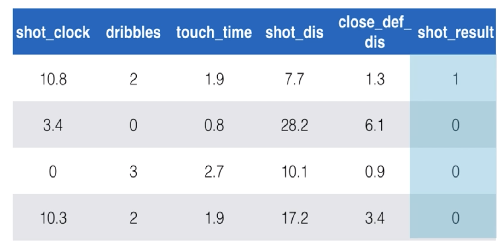

In [14]:
from PIL import Image
image_name1 = 'Photos/basketball.png'
im1 = Image.open(image_name1)
im1_resized = im1.resize((500, 250), Image.NEAREST)
im1_resized.save('Photos/resized_basketbal.png')
from IPython.display import Image
Image(filename = "Photos/resized_basketbal.png")

<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        خب اینجا خروجی فقط یه ستونه ولی ما در خروجی دو تا نورون داریم و بنابراین باید برای هر نورون در خروجی یه ستون داده ی خروجی داشته باشیم. به نظرم دیگه توضیح ندم چطوری. خیلی ضایست
        منتها داستان اینه که اینکار اونقدر رایجه که کراس براش یه فانکشن داره که شما با کال کردن اون می تونه بسیار ساده داده تو به کتگوریکال تبدیل کنی که اسم تابع هست
        <br> to_categorical()
        

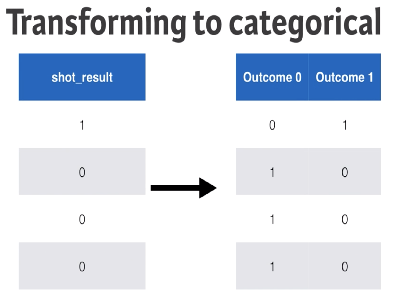

In [23]:
from PIL import Image
image_name2 = 'Photos/basketball_categor.png'
im2 = Image.open(image_name2)
im2_resized = im2.resize((400, 300), Image.NEAREST)
im2_resized.save('Photos/resized_basketbal_categor.png')
from IPython.display import Image
Image(filename = "Photos/resized_basketbal_categor.png")


<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        حالا می خوایم مثال تایتانیک رو برات بزنیم که یه مساله ی کلاسیفیکیشن هست و در واقع خروجی اینه که آیا یک شخص زنده می مونه یانه. و ورودی اش هم ده تا فیچره مثل کرایه ای که پرداخت کرده، جایی که سوار شده و چیزای دیگه
        <br> 

In [131]:
import pandas as pd
import keras
from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential

df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        که خب من نمی تونم اینها رو بدم به شبکه چون ورودی ها که عدد نیستند. الآن که نمی خوام این مساله رو حل کنم. فقط می خوام باهاش یه مدل ران کنم. پس داده های ناجور رو حذف میکنم و همچنین به یک کد داده ی زن یا مرد بودن رو به باینری تبدیل میکنم

In [132]:
predictor_data = df.drop(['Survived', 'Name', 'Ticket','Cabin','Embarked'], axis=1)
predictor_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,male,22.0,1,0,7.2500
1,2,1,female,38.0,1,0,71.2833
2,3,3,female,26.0,0,0,7.9250
3,4,1,female,35.0,1,0,53.1000
4,5,3,male,35.0,0,0,8.0500


In [138]:
target_data = to_categorical(df.Survived)
input_data00 = predictor_data.to_numpy()
print(input_data00[45:67,:])


[[46 3 'male' nan 0 0 8.05]
 [47 3 'male' nan 1 0 15.5]
 [48 3 'female' nan 0 0 7.75]
 [49 3 'male' nan 2 0 21.6792]
 [50 3 'female' 18.0 1 0 17.8]
 [51 3 'male' 7.0 4 1 39.6875]
 [52 3 'male' 21.0 0 0 7.8]
 [53 1 'female' 49.0 1 0 76.7292]
 [54 2 'female' 29.0 1 0 26.0]
 [55 1 'male' 65.0 0 1 61.9792]
 [56 1 'male' nan 0 0 35.5]
 [57 2 'female' 21.0 0 0 10.5]
 [58 3 'male' 28.5 0 0 7.2292]
 [59 2 'female' 5.0 1 2 27.75]
 [60 3 'male' 11.0 5 2 46.9]
 [61 3 'male' 22.0 0 0 7.2292]
 [62 1 'female' 38.0 0 0 80.0]
 [63 1 'male' 45.0 1 0 83.475]
 [64 3 'male' 4.0 3 2 27.9]
 [65 1 'male' nan 0 0 27.7208]
 [66 3 'male' nan 1 1 15.2458]
 [67 2 'female' 29.0 0 0 10.5]]


In [140]:
input_data01 = input_data00[:,1:7]
n_col_input = input_data01.shape[1]
print(input_data01[45:67,:])

[[3 'male' nan 0 0 8.05]
 [3 'male' nan 1 0 15.5]
 [3 'female' nan 0 0 7.75]
 [3 'male' nan 2 0 21.6792]
 [3 'female' 18.0 1 0 17.8]
 [3 'male' 7.0 4 1 39.6875]
 [3 'male' 21.0 0 0 7.8]
 [1 'female' 49.0 1 0 76.7292]
 [2 'female' 29.0 1 0 26.0]
 [1 'male' 65.0 0 1 61.9792]
 [1 'male' nan 0 0 35.5]
 [2 'female' 21.0 0 0 10.5]
 [3 'male' 28.5 0 0 7.2292]
 [2 'female' 5.0 1 2 27.75]
 [3 'male' 11.0 5 2 46.9]
 [3 'male' 22.0 0 0 7.2292]
 [1 'female' 38.0 0 0 80.0]
 [1 'male' 45.0 1 0 83.475]
 [3 'male' 4.0 3 2 27.9]
 [1 'male' nan 0 0 27.7208]
 [3 'male' nan 1 1 15.2458]
 [2 'female' 29.0 0 0 10.5]]


In [147]:
for row in range(0, input_data01.shape[0]):
    if input_data01[row,1] == 'male':
        input_data01[row,1] = 1
    else:
        input_data01[row,1] = 0  
print(input_data01[45:67,:])

[[3 1 0 0 0 8.05]
 [3 1 0 1 0 15.5]
 [3 0 0 0 0 7.75]
 [3 1 0 2 0 21.6792]
 [3 0 0 1 0 17.8]
 [3 1 0 4 1 39.6875]
 [3 1 0 0 0 7.8]
 [1 0 0 1 0 76.7292]
 [2 0 0 1 0 26.0]
 [1 1 0 0 1 61.9792]
 [1 1 0 0 0 35.5]
 [2 0 0 0 0 10.5]
 [3 1 0 0 0 7.2292]
 [2 0 0 1 2 27.75]
 [3 1 0 5 2 46.9]
 [3 1 0 0 0 7.2292]
 [1 0 0 0 0 80.0]
 [1 1 0 1 0 83.475]
 [3 1 0 3 2 27.9]
 [1 1 0 0 0 27.7208]
 [3 1 0 1 1 15.2458]
 [2 0 0 0 0 10.5]]


In [149]:
model_titanic = Sequential()
model_titanic.add(Dense(32, activation='relu', input_shape=(n_col_input,)))
model_titanic.add(Dense(2, activation = 'softmax'))
model_titanic.compile(optimizer = 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_titanic.fit(input_data01, target_data, epochs=5)

Epoch 1/5
891/891 [==============================] - 0s 70us/step - loss: 2.9043 - accuracy: 0.5690
Epoch 2/5
891/891 [==============================] - 0s 20us/step - loss: 1.0440 - accuracy: 0.6105
Epoch 3/5
891/891 [==============================] - 0s 24us/step - loss: 0.7254 - accuracy: 0.6734
Epoch 4/5
891/891 [==============================] - 0s 22us/step - loss: 0.6062 - accuracy: 0.6891
Epoch 5/5
891/891 [==============================] - 0s 19us/step - loss: 0.6331 - accuracy: 0.6678


<br>
<div align='center'>
    <font size=4, color='#003366'>
        <b>Model: Save, Load, and Use</b>
    </font>
    </div>
<br>

<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        می بینی که کراس چقدر کارا رو راحت کرده؟ خداوکیلی میگما
        <br> وقتی یه مدل رو ترین کردی. درواقع یه استراکچر شبکه عصبی ساختی و با کلی دیتا ترینش کردی و حالا همه ی وزنهای بهینه برای پیش بینی رو درآوردی. الآن می تونی این مدل رو سیو کنی. که خب تابعش توی کراس هست. و وقتی سیوش کردی می توی اودش کنی که باز تابعش توی کراس هست. 
        <br> و هر وقت خواستی می تونی باهاش پیش بینی انجام بدی که باز تابعش توی کراس هست. 
        با مثال زیر می فهمی که چطوری می تونی از این توابع استفاده کنی. همچنین یه تابع داری که باهاش می تونی یه خلاصه از ساختار مدلت بگیری
        <br> نکته: مدل رو با اکستنشن اچ فایو سیو می کنند

In [150]:
model_titanic.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 66        
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


In [151]:
from keras.models import load_model
model_titanic.save('titanic_predictor.h5')
model = load_model('titanic_predictor.h5')


<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        <br> الآن باید دیتای تست رو لود کنم و همون تغییرات رو بهش بدم و بدمش به شبکه تا پیش بینی کنه
        

In [152]:
df2 = pd.read_csv("test_titanic.csv")
data_to_predict = df2.drop(['Name', 'Ticket','Cabin','Embarked'], axis=1)
tester = data_to_predict.to_numpy()

print(tester[40:67,:])      

[[932 3 'male' 39.0 0 1 13.4167]
 [933 1 'male' nan 0 0 26.55]
 [934 3 'male' 41.0 0 0 7.85]
 [935 2 'female' 30.0 0 0 13.0]
 [936 1 'female' 45.0 1 0 52.5542]
 [937 3 'male' 25.0 0 0 7.925]
 [938 1 'male' 45.0 0 0 29.7]
 [939 3 'male' nan 0 0 7.75]
 [940 1 'female' 60.0 0 0 76.2917]
 [941 3 'female' 36.0 0 2 15.9]
 [942 1 'male' 24.0 1 0 60.0]
 [943 2 'male' 27.0 0 0 15.0333]
 [944 2 'female' 20.0 2 1 23.0]
 [945 1 'female' 28.0 3 2 263.0]
 [946 2 'male' nan 0 0 15.5792]
 [947 3 'male' 10.0 4 1 29.125]
 [948 3 'male' 35.0 0 0 7.8958]
 [949 3 'male' 25.0 0 0 7.65]
 [950 3 'male' nan 1 0 16.1]
 [951 1 'female' 36.0 0 0 262.375]
 [952 3 'male' 17.0 0 0 7.8958]
 [953 2 'male' 32.0 0 0 13.5]
 [954 3 'male' 18.0 0 0 7.75]
 [955 3 'female' 22.0 0 0 7.725]
 [956 1 'male' 13.0 2 2 262.375]
 [957 2 'female' nan 0 0 21.0]
 [958 3 'female' 18.0 0 0 7.8792]]


In [154]:
tester01 = tester[:,1:7]
print(tester01[40:67,:])

[[3 'male' 39.0 0 1 13.4167]
 [1 'male' nan 0 0 26.55]
 [3 'male' 41.0 0 0 7.85]
 [2 'female' 30.0 0 0 13.0]
 [1 'female' 45.0 1 0 52.5542]
 [3 'male' 25.0 0 0 7.925]
 [1 'male' 45.0 0 0 29.7]
 [3 'male' nan 0 0 7.75]
 [1 'female' 60.0 0 0 76.2917]
 [3 'female' 36.0 0 2 15.9]
 [1 'male' 24.0 1 0 60.0]
 [2 'male' 27.0 0 0 15.0333]
 [2 'female' 20.0 2 1 23.0]
 [1 'female' 28.0 3 2 263.0]
 [2 'male' nan 0 0 15.5792]
 [3 'male' 10.0 4 1 29.125]
 [3 'male' 35.0 0 0 7.8958]
 [3 'male' 25.0 0 0 7.65]
 [3 'male' nan 1 0 16.1]
 [1 'female' 36.0 0 0 262.375]
 [3 'male' 17.0 0 0 7.8958]
 [2 'male' 32.0 0 0 13.5]
 [3 'male' 18.0 0 0 7.75]
 [3 'female' 22.0 0 0 7.725]
 [1 'male' 13.0 2 2 262.375]
 [2 'female' nan 0 0 21.0]
 [3 'female' 18.0 0 0 7.8792]]


In [165]:
for row in range(0, tester01.shape[0]):
    if tester01[row,1] == 'male':
        tester01[row,1] = 1
    else:
        tester01[row,1] = 0
        
print(tester01[40:67,:])

[[3 0 39.0 0 1 13.4167]
 [1 0 nan 0 0 26.55]
 [3 0 41.0 0 0 7.85]
 [2 0 30.0 0 0 13.0]
 [1 0 45.0 1 0 52.5542]
 [3 0 25.0 0 0 7.925]
 [1 0 45.0 0 0 29.7]
 [3 0 nan 0 0 7.75]
 [1 0 60.0 0 0 76.2917]
 [3 0 36.0 0 2 15.9]
 [1 0 24.0 1 0 60.0]
 [2 0 27.0 0 0 15.0333]
 [2 0 20.0 2 1 23.0]
 [1 0 28.0 3 2 263.0]
 [2 0 nan 0 0 15.5792]
 [3 0 10.0 4 1 29.125]
 [3 0 35.0 0 0 7.8958]
 [3 0 25.0 0 0 7.65]
 [3 0 nan 1 0 16.1]
 [1 0 36.0 0 0 262.375]
 [3 0 17.0 0 0 7.8958]
 [2 0 32.0 0 0 13.5]
 [3 0 18.0 0 0 7.75]
 [3 0 22.0 0 0 7.725]
 [1 0 13.0 2 2 262.375]
 [2 0 nan 0 0 21.0]
 [3 0 18.0 0 0 7.8792]]


In [162]:
predictions = model.predict(tester01)
print(predictions)


[[6.63576648e-02 9.33642328e-01]
 [2.15123203e-02 9.78487670e-01]
 [3.19716008e-03 9.96802807e-01]
 [1.50779113e-01 8.49220872e-01]
 [3.69626641e-01 6.30373359e-01]
 [4.40885425e-01 5.59114575e-01]
 [1.03957228e-01 8.96042764e-01]
 [3.72749597e-01 6.27250373e-01]
 [3.02381933e-01 6.97618127e-01]
 [5.09898245e-01 4.90101814e-01]
 [           nan            nan]
 [6.20648824e-02 9.37935054e-01]
 [2.61739522e-01 7.38260388e-01]
 [1.52465096e-02 9.84753489e-01]
 [1.51466697e-01 8.48533332e-01]
 [3.81809264e-01 6.18190765e-01]
 [7.76325092e-02 9.22367513e-01]
 [2.36075982e-01 7.63924003e-01]
 [1.84546351e-01 8.15453589e-01]
 [2.02699434e-02 9.79730010e-01]
 [1.06552161e-01 8.93447876e-01]
 [4.93055791e-01 5.06944239e-01]
 [           nan            nan]
 [2.91548759e-01 7.08451211e-01]
 [2.53913533e-02 9.74608660e-01]
 [2.87468340e-02 9.71253216e-01]
 [2.83153355e-01 7.16846645e-01]
 [2.06967533e-01 7.93032467e-01]
 [1.23953775e-01 8.76046240e-01]
 [           nan            nan]
 [6.276895

<div align = 'right'>
    <font size=2, style='font-family:B Nazanin'>
        خب الآن این چیزیه که پیش بینی کرده. ستون اول مثلا احتمال زنده موندنه و ستون دوم احتمال مردن. که خب مسلما جمعشون یک خواهد بود
        <br> من فقط به یکیش علاقه دارم دیگه

In [164]:
survival_probability = predictions[:,1]